<b>I am very keen on new methods and models in machine learning. This is why I use the involutional neural network [1]. I think it is a very interesting approach. Involution based models are good in respect of the model complexity problem.</b>


I have used the following methods.

* I used an image enhancement method for images (increasing brightness),
* Created an INN (involutional neural network) layer,
* Rectified and recreated functions in this notebook [2],
* Custom callback for evaluating test dataset during training each 10 epochs[3]

<br>

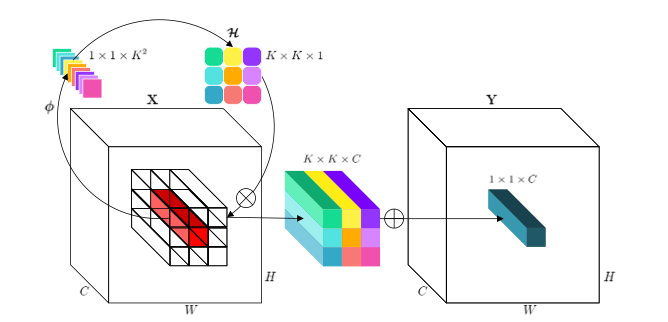

<i> <b>Figure 1:</b> Schematic illustration of our proposed involution [1]</i>


## Image Processing Operation

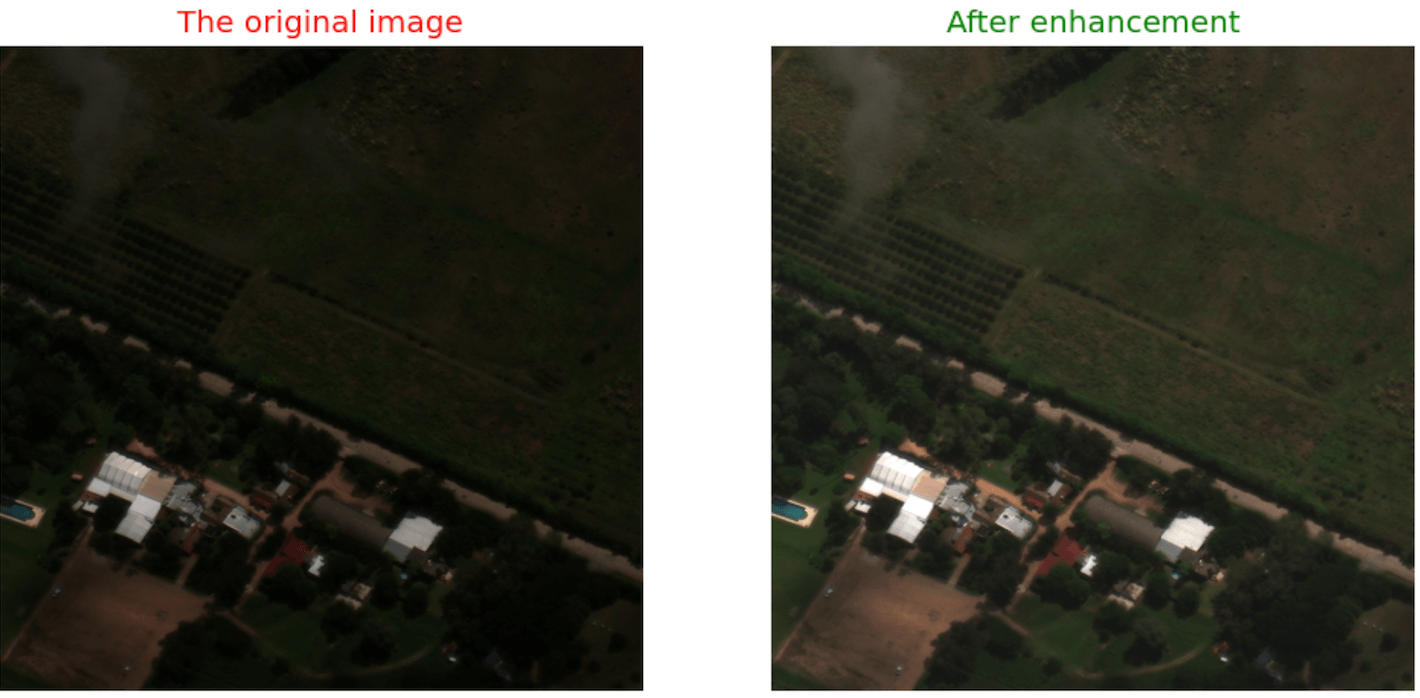
<i> <b>Figure 2:</b> Image enhancement example </i>


## My Other Projects

* [Smoking Detection w/Online Learning (River)](https://www.kaggle.com/code/banddaniel/smoking-detection-w-online-learning-river)
* [Iris Segmentation U-net w/TPU (Dice Coef: 0.94)](https://www.kaggle.com/code/banddaniel/iris-segmentation-u-net-w-tpu-dice-coef-0-94)


## References
1. Li, D., Hu, J., Wang, C., Li, X., She, Q., Zhu, L., Zhang, T., & Chen, Q. (2021). Involution: Inverting the Inherence of Convolution for Visual Recognition (Version 2). arXiv. https://doi.org/10.48550/ARXIV.2103.06255
2. https://keras.io/examples/vision/involution/
3. https://github.com/john-fante/my-tensorflow-custom-callbacks

In [1]:
# Importing dependencies

import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import *
import keras
from tensorflow.keras.callbacks import Callback

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score,RocCurveDisplay

SEED = 66
IMG_SIZE = 256, 256
BATCH_SIZE = 32
AUTO = tf.data.AUTOTUNE

# <span style="color:#e74c3c;"> Reading </span> Data

In [2]:
data = pd.read_csv('/kaggle/input/cloud-coverage-classification/cloud_classification/cloud_classification_export.csv')
data['full_image_path'] = "/kaggle/input/cloud-coverage-classification/cloud_classification/" + data['image']
data = data.dropna(ignore_index = True)

le = LabelEncoder()
data['label'] = le.fit_transform(data['choice'])


classes = {0:'High', 1:'Low', 2:'Medium', 3:'Very High', 4:'Very Low'}

# <span style="color:#e74c3c;"> Image </span> Processing

(-0.5, 799.5, 799.5, -0.5)

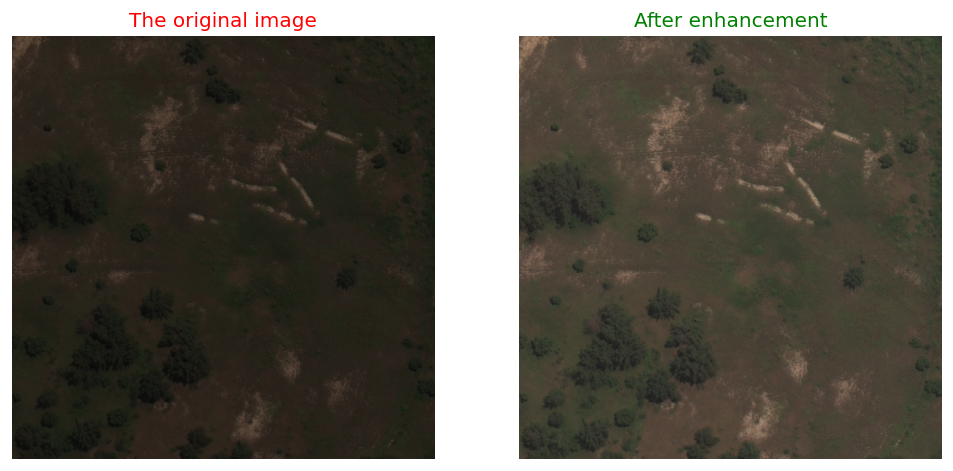

In [3]:
# An example of image operations

normal_image = cv2.imread('/kaggle/input/cloud-coverage-classification/cloud_classification/images/147176c8-1069_800_1600.png')

normal_image = cv2.cvtColor(normal_image, cv2.COLOR_BGR2RGB) 
    
final_img = cv2.convertScaleAbs(normal_image, alpha=1.5, beta=15) 


fig, axs = plt.subplots(1,2, figsize = (10,5), dpi = 120)

axs[0].imshow(normal_image, cmap = 'gray')
axs[0].set_title('The original image', color = 'red')
axs[0].axis('off')

axs[1].imshow(final_img, cmap = 'gray')
axs[1].set_title('After enhancement', color ='green')
axs[1].axis('off')

In [4]:
# Creating new folder
os.mkdir(os.path.join('/kaggle/working/', 'images'))

In [5]:
def image_enhancement(main_path, target_path):
    main_imgs = sorted(os.listdir(main_path))
    for i in main_imgs :

        img = cv2.imread(os.path.join(main_path, i))  
        final_img = cv2.convertScaleAbs(img, alpha=1.5, beta=15) 
        cv2.imwrite(os.path.join(target_path, i), final_img)
        

# applying image enhancement operation to dataset
image_enhancement('/kaggle/input/cloud-coverage-classification/cloud_classification/images',
                  '/kaggle/working/images')

# <span style="color:#e74c3c;"> Creating </span> Datasets

In [6]:
data['full_new_image_path'] = "/kaggle/working/" + data['image']

full_data, test_data = train_test_split(data, test_size = 0.09, stratify = data['label'])
train_data, valid_data = train_test_split(full_data, test_size = 0.15, stratify = full_data['label'])


print("train images  -> ", train_data.shape[0])
print("valid images  -> ", valid_data.shape[0])
print("test images -> ", test_data.shape[0])

data.head()

train images  ->  550
valid images  ->  98
test images ->  65


,annotation_id,annotator,choice,created_at,id,image,lead_time,updated_at,full_image_path,label,full_new_image_path
0,3615,1,Very Low,2024-01-18T22:28:48.141115Z,3080,images/61fc8a7d-578_1600_1600.png,8.626,2024-01-18T22:28:48.141115Z,/kaggle/input/cloud-coverage-classification/cl...,4,/kaggle/working/images/61fc8a7d-578_1600_1600.png
1,3616,1,High,2024-01-18T22:28:54.176795Z,3081,images/4278ef08-592_0_0.png,5.809,2024-01-18T22:28:54.176795Z,/kaggle/input/cloud-coverage-classification/cl...,0,/kaggle/working/images/4278ef08-592_0_0.png
2,3617,1,Low,2024-01-18T22:28:59.837955Z,3082,images/e7e916ce-592_0_800.png,5.440,2024-01-18T22:28:59.837955Z,/kaggle/input/cloud-coverage-classification/cl...,1,/kaggle/working/images/e7e916ce-592_0_800.png
3,3618,1,Very Low,2024-01-18T22:29:02.130852Z,3083,images/51d465ee-592_0_1600.png,2.072,2024-01-18T22:29:02.130852Z,/kaggle/input/cloud-coverage-classification/cl...,4,/kaggle/working/images/51d465ee-592_0_1600.png
4,3619,1,Very High,2024-01-18T22:29:05.087226Z,3084,images/f357ed3e-592_800_0.png,2.734,2024-01-18T22:29:05.087226Z,/kaggle/input/cloud-coverage-classification/cl...,3,/kaggle/working/images/f357ed3e-592_800_0.png


# <span style="color:#e74c3c;"> Creating </span> tf.data Pipeline

In [7]:
# Reading -> Resizing -> Normalization
def img_preprocessing(image, label):
    img = tf.io.read_file(image)
    img = tf.io.decode_png(img, channels = 3)
    img = tf.image.resize(img, size =(IMG_SIZE))
    img = tf.cast(img, tf.float32) / 255.0
    
    
    return img, label


# Data augmentation 
img_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation((-0.3, 0.3), interpolation="bilinear"),
    RandomContrast(0.03),
    RandomCrop(*IMG_SIZE)])

In [8]:
# Creating dataset loaders and tf.datasets

train_loader = tf.data.Dataset.from_tensor_slices((train_data['full_new_image_path'], train_data['label']))
train_dataset = (train_loader
                 .map(img_preprocessing, num_parallel_calls = AUTO)
                 .shuffle(BATCH_SIZE*10)
                 .batch(BATCH_SIZE)
                 .map(lambda img, label: (img_augmentation(img), label), num_parallel_calls =AUTO)
                 .prefetch(AUTO))


valid_loader = tf.data.Dataset.from_tensor_slices((valid_data['full_new_image_path'], valid_data['label']))
valid_dataset = (valid_loader
                 .map(img_preprocessing, num_parallel_calls = AUTO)
                 .batch(BATCH_SIZE)
                 .prefetch(AUTO))

test_loader = tf.data.Dataset.from_tensor_slices((test_data['full_new_image_path'], test_data['label']))
test_dataset = (test_loader
                 .map(img_preprocessing, num_parallel_calls = AUTO)
                 .batch(BATCH_SIZE)
                 .prefetch(AUTO))

# <span style="color:#e74c3c;"> Involution </span> Layer

In [9]:
class Involution(Layer):
    def __init__(self, channel, group_num, kernel_size, stride, reduce_ratio, **kwargs):
        super(Involution, self).__init__(**kwargs)
        self.channel = channel
        self.group_num = group_num
        self.kernel_size = kernel_size
        self.stride = stride
        self.reduce_ratio = reduce_ratio


    def build(self, input_shape):
        (_, height, width, num_channels) = input_shape
        height = height // self.stride
        width = width // self.stride

        self.stride_layer = AveragePooling2D(pool_size = self.stride, strides = self.stride, padding = 'same')
        self.kernel_gen = keras.Sequential([ 
            Conv2D(filters = self.channel // self.reduce_ratio , kernel_size = 1),
            BatchNormalization(),
            Activation('relu'),
            Conv2D(filters = self.kernel_size*self.kernel_size*self.group_num, kernel_size = 1)   ])

        self.kernel_reshape = Reshape(target_shape=(height, width, self.kernel_size*self.kernel_size, 1, self.group_num))
        self.input_patches_reshape = Reshape(target_shape=(height, width, self.kernel_size*self.kernel_size, 
                                                           num_channels // self.group_num, self.group_num))

        self.output_reshape = Reshape(target_shape=(height, width, num_channels))



    def call(self, inputs):
        kernel_input = self.stride_layer(inputs)
        kernel = self.kernel_gen(kernel_input)

        kernel = self.kernel_reshape(kernel)

        input_patches = tf.image.extract_patches(images = inputs,
                                                 sizes=[1, self.kernel_size, self.kernel_size, 1],
                                                 strides=[1, self.stride, self.stride, 1],
                                                 rates=[1, 1, 1, 1], padding="SAME")
    
        input_patches = self.input_patches_reshape(input_patches)

        output = tf.multiply(kernel, input_patches)
        output = tf.reduce_sum(output, axis=3)

        output = self.output_reshape(output)

        return output
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config,
                "channel" : self.channel,
                "group_num": self.group_num,
                "kernel_size" : self.kernel_size,
                "stride" : self.stride,
                "reduce_ratio" : self.reduce_ratio}

In [10]:
# a custom callback for evaluation of test set during training each 10 loop
class Test_Pred_During_Training(Callback):
    
    def __init__(self, model):
        self.model = model
        
    def on_epoch_end(self, epochs, logs = None ):
        try:
            if (epochs+1) % 10 == 0:
                test_pred = self.model.predict(test_dataset, verbose = 0)
                test_pred = np.argmax(test_pred, axis = 1)

                mse = mean_squared_error(test_data['label'], test_pred)
                f1 = f1_score(test_data['label'], test_pred, average = 'weighted')
                acc = accuracy_score(test_data['label'], test_pred)

                print('\nMean Squared Error : {0:.5f}'.format(mse))
                print('Weighted F1 Score : {0:.3f}'.format(f1))
                print('Accuracy Score : {0:.3f} %'.format(acc*100))

                print("--"*40)
        except ValueError:
            pass

In [11]:
inp = Input(shape=(*IMG_SIZE, 3))
    
X = Involution(channel = 32, group_num=3, kernel_size=3, stride=1, reduce_ratio=3, name="Involution_1")(inp)
X = ReLU()(X)
X = MaxPooling2D((2, 2))(X)
    
X = Involution(channel = 32, group_num=3, kernel_size=3, stride=1, reduce_ratio=3, name="Involution_2")(X)
X = ReLU()(X)
X = MaxPooling2D((2, 2))(X)


X = Involution(channel = 32, group_num=3, kernel_size=3, stride=1, reduce_ratio=3, name="Involution_3")(X)
X = ReLU()(X)
X = MaxPooling2D((2, 2))(X)


X = Flatten()(X)
X = Dense(128, activation="relu")(X)
out = Dense(5)(X)

model = keras.Model(inputs=[inp], outputs=[out])


model.compile(optimizer = tf.optimizers.SGD(learning_rate = 0.0005, weight_decay = 0.04, momentum = 0.9),
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["acc"])

model.summary()

my_callbacks = [Test_Pred_During_Training(model),tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0.01,patience=20),
                tf.keras.callbacks.ModelCheckpoint("/kaggle/working/my_model.tf", monitor="val_loss",
                                                   mode="min", save_best_only=True, verbose=1)]

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 Involution_1 (Involution)   (None, 256, 256, 3)       377       
                                                                 
 re_lu (ReLU)                (None, 256, 256, 3)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 3)       0         
 D)                                                              
                                                                 
 Involution_2 (Involution)   (None, 128, 128, 3)       377       
                                                                 
 re_lu_1 (ReLU)              (None, 128, 128, 3)       0         
                                                             

In [12]:
hist = model.fit(train_dataset, epochs = 120, validation_data = valid_dataset, callbacks = [my_callbacks])

Epoch 1/120
18/18 [==============================] - ETA: 0s - loss: 1.4029 - acc: 0.4709
Epoch 1: val_loss improved from inf to 1.60080, saving model to /kaggle/working/my_model.tf
18/18 [==============================] - 14s 377ms/step - loss: 1.4029 - acc: 0.4709 - val_loss: 1.6008 - val_acc: 0.5612
Epoch 2/120
17/18 [===========================>..] - ETA: 0s - loss: 1.2120 - acc: 0.5607
Epoch 2: val_loss improved from 1.60080 to 1.59523, saving model to /kaggle/working/my_model.tf
18/18 [==============================] - 9s 379ms/step - loss: 1.2074 - acc: 0.5618 - val_loss: 1.5952 - val_acc: 0.5612
Epoch 3/120
17/18 [===========================>..] - ETA: 0s - loss: 1.2124 - acc: 0.5588
Epoch 3: val_loss improved from 1.59523 to 1.59196, saving model to /kaggle/working/my_model.tf
18/18 [==============================] - 9s 401ms/step - loss: 1.2114 - acc: 0.5564 - val_loss: 1.5920 - val_acc: 0.5612
Epoch 4/120
18/18 [==============================] - ETA: 0s - loss: 1.1165 - acc:

# <span style="color:#e74c3c;"> Training</span> Results

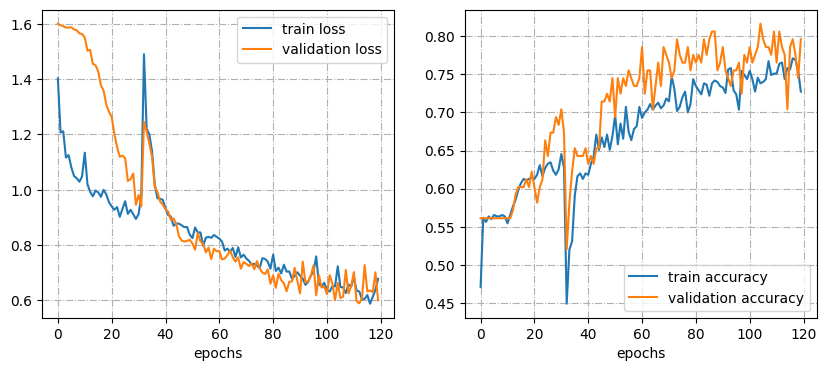

In [13]:
fig, axs = plt.subplots(1,2, figsize = (10, 4), dpi = 100)

axs[0].grid(linestyle = 'dashdot')
axs[0].plot(hist.history['loss'])
axs[0].plot(hist.history['val_loss'])
axs[0].set_xlabel('epochs', fontsize = 10)
axs[0].legend(['train loss', 'validation loss'], fontsize = 10)


axs[1].grid(linestyle = 'dashdot')
axs[1].plot(hist.history['acc'])
axs[1].plot(hist.history['val_acc'])
axs[1].set_xlabel('epochs', fontsize = 10)
axs[1].legend(['train accuracy', 'validation accuracy'], fontsize = 10)

# <span style="color:#e74c3c;"> Test </span> Prediction

In [14]:
# Predictions and scores
test_pred = model.predict(test_dataset)
test_pred = np.argmax(test_pred, axis = 1)

mse = mean_squared_error(test_data['label'], test_pred)
f1 = f1_score(test_data['label'], test_pred, average = 'weighted')
acc = accuracy_score(test_data['label'], test_pred)

print('Mean Squared Error : {0:.5f}'.format(mse))
print('Weighted F1 Score : {0:.3f}'.format(f1))
print('Accuracy Score : {0:.3f} %'.format(acc*100))

3/3 [==============================] - 0s 100ms/step
Mean Squared Error : 1.76923
Weighted F1 Score : 0.707
Accuracy Score : 73.846 %


# <span style="color:#e74c3c;"> Classification </span> Report

In [15]:
clf = classification_report(test_data['label'], test_pred, target_names = list(classes.values()))
print(clf)

              precision    recall  f1-score   support

        High       0.25      0.17      0.20         6
         Low       1.00      0.44      0.62         9
      Medium       1.00      0.25      0.40         8
   Very High       0.45      1.00      0.62         5
    Very Low       0.82      0.97      0.89        37

    accuracy                           0.74        65
   macro avg       0.70      0.57      0.55        65
weighted avg       0.79      0.74      0.71        65



# <span style="color:#e74c3c;"> Confusion </span> Matrix

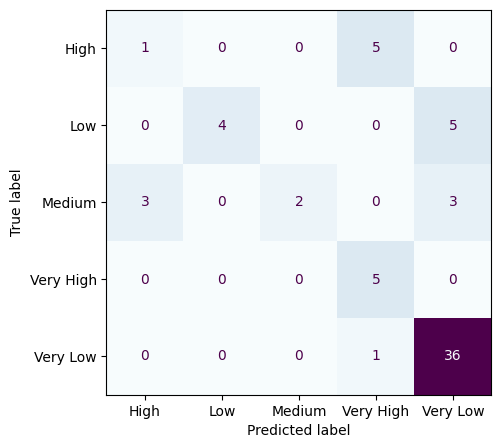

In [16]:
cm = confusion_matrix(test_data['label'], test_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels = list(classes.values()))

fig, ax = plt.subplots(figsize=(5,5))
cmd.plot(ax=ax,  cmap = 'BuPu', colorbar = False)

# <span style="color:#e74c3c;"> Test Set </span> Predictions

In [17]:
test_take1 =  test_dataset.take(-1)
test_take1_ = list(test_take1)

# A function that creating 5 random images in the test set and predictions

# Red title -> a false prediction
# Green title -> a true prediction

def random_test_sample_with_prediction(SEED):
    idxs = np.random.default_rng(seed=SEED).permutation(len(test_pred))[:5]
    batch_idx = idxs // BATCH_SIZE
    image_idx = idxs-batch_idx * BATCH_SIZE
    idx = idxs

    fig, axs = plt.subplots(1,5, figsize = (12,12) ,dpi = 150)

    for i in range(5):
        img = test_take1_[batch_idx[i]][0][image_idx[i]]
        
        label = test_take1_[batch_idx[i]][1][image_idx[i]].numpy()
        

        if int(test_pred[idx[i]]) == label:
            axs[i].imshow(img, cmap = 'gray') 
            axs[i].axis('off')
            axs[i].set_title('image (no: ' + str(idx[i])  + ')' + '\n TRUE: ' + le.inverse_transform([label])[0] 
                             + '\n PRED: ' + le.inverse_transform([int(test_pred[idx[i]])])[0]
                             , fontsize = 8, color = 'green')
        else:
            axs[i].imshow(img,  cmap = 'gray')
            axs[i].axis('off')
            axs[i].set_title('image (no: ' + str(idx[i])  + ')' + '\n TRUE: ' + le.inverse_transform([label])[0] 
                             + '\n PRED: ' + le.inverse_transform([int(test_pred[idx[i]])])[0]
                             , fontsize = 8, color = 'red')

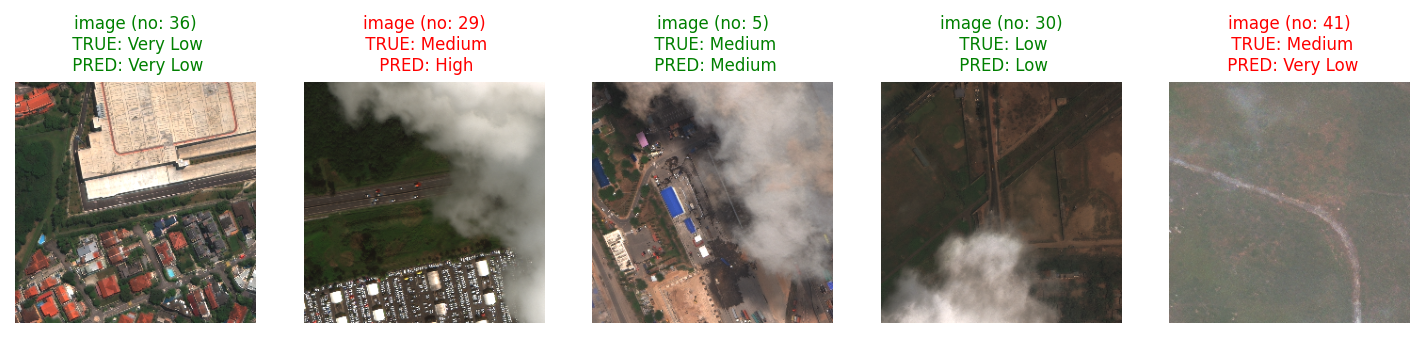

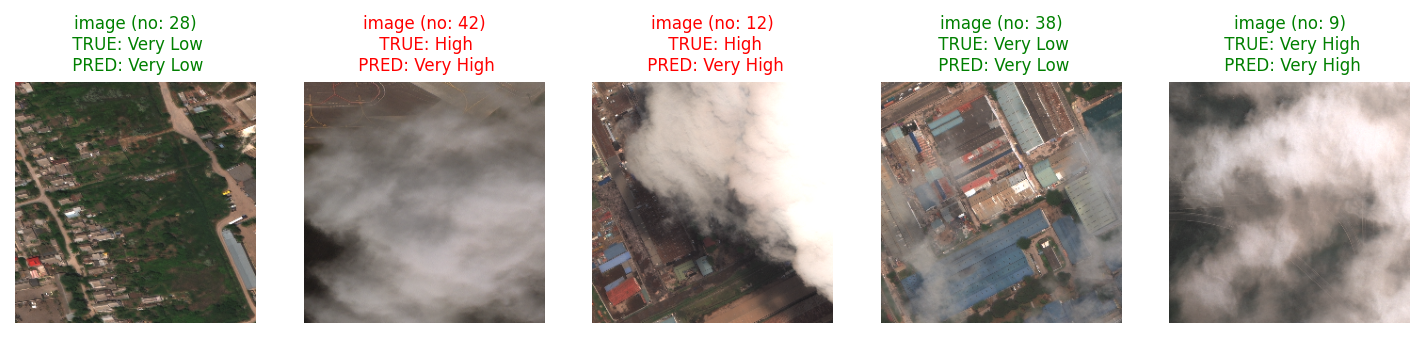

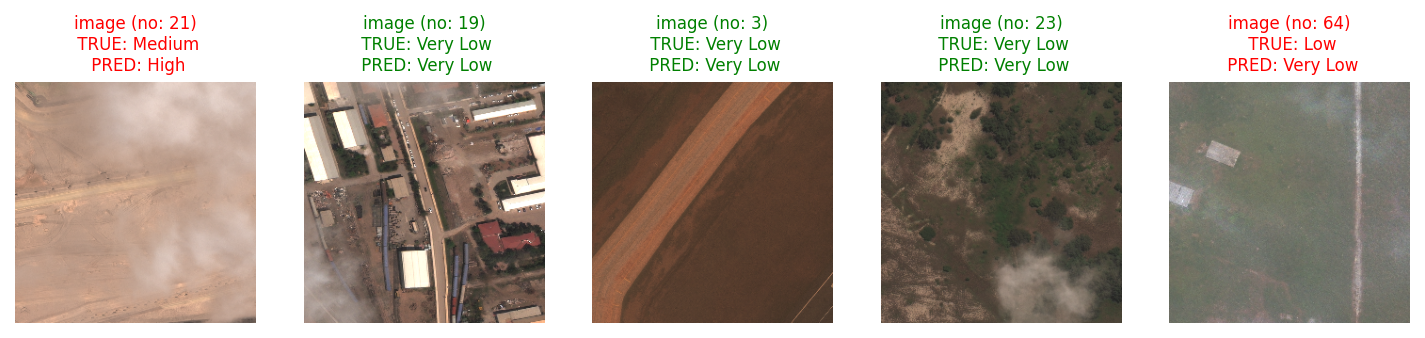

In [18]:
# Red title -> a false prediction
# Green title -> a true prediction

random_test_sample_with_prediction(10)
random_test_sample_with_prediction(104)
random_test_sample_with_prediction(193)